# Project

Pattern Detection: We need to write a Python script (pandas, matplotlib/seaborn) to find and visualize patterns in engagement by patient demographics.

Let us import all the necessary libraries to visualize the data sets given 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let us import the csv files into a pandas dataframe to be able to visualize and derive insights

In [47]:
df_p = pd.read_csv("/Users/aishwaryasugumaran/Downloads/Patients.csv")
df_p.head()

patient_id gender  age region signup_date
0           1      M   34   East  2025-01-15
1           2      F   47  North  2024-12-20
2           3      M   55  South  2025-02-02
3           4      F   29   West  2025-01-10
4           5      F   38   East  2024-12-28

In [48]:
df_a = pd.read_csv("/Users/aishwaryasugumaran/Downloads/Appointments.csv")
df_a.head()

appointment_id  patient_id scheduled_date attended_flag provider_type
0             101           1       01/06/25             Y            GP
1             102           1       14/07/25             N    Specialist
2             103           2       10/06/25             Y     Therapist
3             104           3       15/06/25             Y            GP
4             105           3       02/07/25             Y    Specialist

In [49]:
df_e = pd.read_csv("/Users/aishwaryasugumaran/Downloads/Engagement.csv")
df_e.head()

patient_id      date action_type  action_count\t
0           1  6/1/2025       login               2
1           1  6/3/2025     article               1
2           2  6/5/2025     message               3
3           3  6/2/2025       login               1
4           3  6/4/2025       video               2

If we observe clearly, the column name has "action_count\t". we need to remove the "\t"

In [50]:
df_e.rename(columns={'action_count\t': 'action_count'}, inplace=True)

In [51]:
df_e.head()

patient_id      date action_type  action_count
0           1  6/1/2025       login             2
1           1  6/3/2025     article             1
2           2  6/5/2025     message             3
3           3  6/2/2025       login             1
4           3  6/4/2025       video             2

In [52]:
df_l = pd.read_csv("/Users/aishwaryasugumaran/Downloads/lab_results.csv")
df_l.head()

patient_id    lab_date test_type test_value diagnosis_flag
0           1  2025-05-10     HbA1c        5.8       Negative
1           2  2025-05-12       LDL        180       Positive
2           3  2025-05-18        BP     120/80       Negative
3           4  2025-05-22   Glucose         95       Negative
4           5  2025-06-02     HbA1c        6.2       Positive

By looking at the dataframes we can see that the data types of date columns in each table is following it's own pattern instead of the standard format. Let's convert the format.

In [53]:
df_p['signup_date'] = pd.to_datetime(df_p['signup_date'])
df_a['scheduled_date'] = pd.to_datetime(df_a['scheduled_date'], format='%d/%m/%y')
df_e['date'] = pd.to_datetime(df_e['date'])
df_l['lab_date'] = pd.to_datetime(df_l['lab_date'])

In [54]:
df_l.head()

patient_id   lab_date test_type test_value diagnosis_flag
0           1 2025-05-10     HbA1c        5.8       Negative
1           2 2025-05-12       LDL        180       Positive
2           3 2025-05-18        BP     120/80       Negative
3           4 2025-05-22   Glucose         95       Negative
4           5 2025-06-02     HbA1c        6.2       Positive

In [55]:
df_p.head()

patient_id gender  age region signup_date
0           1      M   34   East  2025-01-15
1           2      F   47  North  2024-12-20
2           3      M   55  South  2025-02-02
3           4      F   29   West  2025-01-10
4           5      F   38   East  2024-12-28

Let us calculate the total engagement per patient. the engagement type can be one of the values of the column action_type in the Engagement dataframe.

In [56]:
total_engagement_per_patient = df_e.groupby('patient_id')['action_count'].sum().reset_index()
total_engagement_per_patient.rename(columns={'action_count': 'total_actions'}, inplace=True)

We are merging this new column that we just created with the patients df and create a new df. 

In [57]:
df_merged = pd.merge(df_p, total_engagement_per_patient, on='patient_id', how='left')

While doing so, there might be patients with no engagement data, we need to fill in these empty columns with '0'

In [58]:
df_merged['total_actions'] = df_merged['total_actions'].fillna(0)

Let us visualize the engagement based on the gender

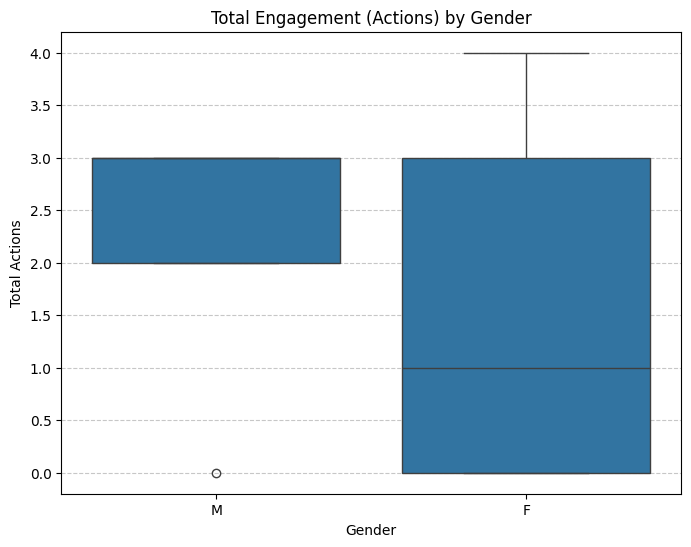

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='total_actions', data=df_merged)
plt.title('Total Engagement (Actions) by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Actions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Next, let's look at engagement based on Age group

There's no already existing age group column, we are creating a new column for visualization purposes.

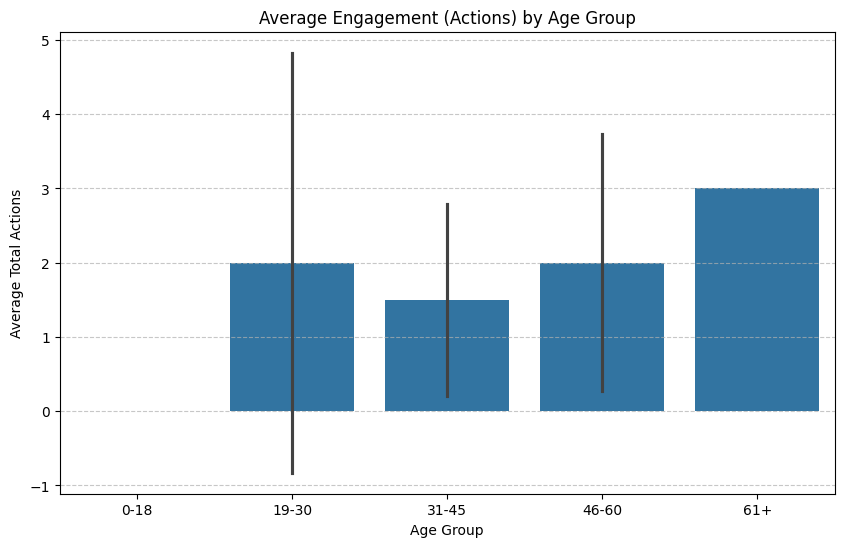

In [60]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df_merged['age_group'] = pd.cut(df_merged['age'], bins =bins, labels=labels, right =False)
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_actions', data=df_merged, errorbar='sd')
plt.title('Average Engagement (Actions) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Actions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Next up, let's look at engagement based on region

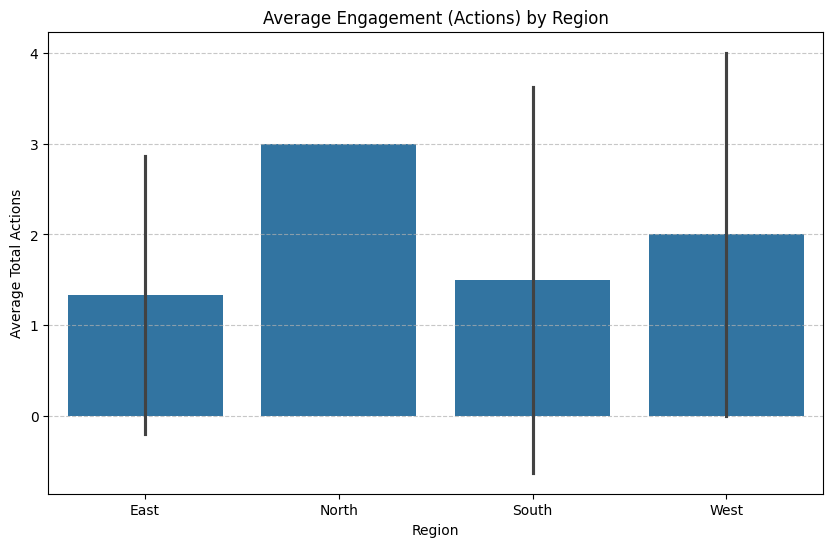

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='total_actions', data=df_merged, errorbar='sd')
plt.title('Average Engagement (Actions) by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Actions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Lets move on to the next oart of the assignment

## Prediction Task: 
we need to build a simple machine learning model to predict whether a patient will miss their next appointment, using available features.

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

The column that we are predicting is the 'attended_flag', for computation purposes let's slightly modify the way info is stored in it

In [63]:
df_a['is_no_show'] = df_a['attended_flag'].apply(lambda x: 1 if x == 'N' else 0)

### Feature Engineering from Engagement Data

Total engagement data per patient

In [64]:
patient_engagement_summary = df_e.groupby('patient_id').agg(
    total_actions=('action_count', 'sum'),
    num_engagement_days=('date', 'nunique'),
    avg_actions_per_day=('action_count', 'mean'),
    max_actions_per_day=('action_count', 'max'), 
    engagement_span_days=(('date', lambda x: (x.max() - x.min()).days if x.nunique() > 1 else 0))
).reset_index()

### Feature Engineering from Lab Results Data

Aggregate lab results data per patient

In [65]:
patient_lab_summary = df_l.groupby('patient_id').agg(
    num_lab_tests=('test_type', 'count'),
    num_unique_lab_types=('test_type', 'nunique'),
    last_lab_date=('lab_date', 'max'),
    has_positive_diagnosis=('diagnosis_flag', lambda x: (x == 'Positive').any().astype(int)),
    avg_test_value_hba1c=('test_value', lambda x: pd.to_numeric(x, errors='coerce').loc[df_l['test_type'] == 'HbA1c'].mean()), # New: Average HbA1c
    avg_test_value_ldl=('test_value', lambda x: pd.to_numeric(x, errors='coerce').loc[df_l['test_type'] == 'LDL'].mean()) # New: Average LDL
).reset_index()

In [66]:
df_model = pd.merge(df_a, df_p, on='patient_id', how='left')
df_model = pd.merge(df_model, patient_engagement_summary, on='patient_id', how='left')
df_model = pd.merge(df_model, patient_lab_summary, on='patient_id', how='left')

df_model['total_actions'] = df_model['total_actions'].fillna(0)
df_model['num_engagement_days'] = df_model['num_engagement_days'].fillna(0)
df_model['avg_actions_per_day'] = df_model['avg_actions_per_day'].fillna(0)
df_model['max_actions_per_day'] = df_model['max_actions_per_day'].fillna(0)
df_model['engagement_span_days'] = df_model['engagement_span_days'].fillna(0)
df_model['num_lab_tests'] = df_model['num_lab_tests'].fillna(0)
df_model['num_unique_lab_types'] = df_model['num_unique_lab_types'].fillna(0)
df_model['has_positive_diagnosis'] = df_model['has_positive_diagnosis'].fillna(0)
df_model['avg_test_value_hba1c'] = df_model['avg_test_value_hba1c'].fillna(df_model['avg_test_value_hba1c'].median())
df_model['avg_test_value_ldl'] = df_model['avg_test_value_ldl'].fillna(df_model['avg_test_value_ldl'].median())

In [67]:
df_model['day_of_week'] = df_model['scheduled_date'].dt.day_name()
df_model['month_of_appointment'] = df_model['scheduled_date'].dt.month_name()
df_model['days_since_signup_at_appointment'] = (df_model['scheduled_date'] - df_model['signup_date']).dt.days
df_model['days_since_signup_at_appointment'] = df_model['days_since_signup_at_appointment'].apply(lambda x: x if x >= 0 else 0)
df_model['days_since_last_lab_test_at_appointment'] = (df_model['scheduled_date'] - df_model['last_lab_date']).dt.days
df_model['days_since_last_lab_test_at_appointment'] = df_model['days_since_last_lab_test_at_appointment'].apply(lambda x: x if x >= 0 else np.nan)
df_model['days_since_last_lab_test_at_appointment'] = df_model['days_since_last_lab_test_at_appointment'].fillna(df_model['days_since_last_lab_test_at_appointment'].median())
df_model['days_since_last_lab_test_at_appointment'] = df_model['days_since_last_lab_test_at_appointment'].fillna(0)

In [68]:
features = [
    'gender', 'age', 'region', 'provider_type',
    'total_actions', 'num_engagement_days', 'avg_actions_per_day', 'max_actions_per_day', 'engagement_span_days',
    'num_lab_tests', 'num_unique_lab_types', 'has_positive_diagnosis',
    'avg_test_value_hba1c', 'avg_test_value_ldl', # New lab test specific averages
    'days_since_last_lab_test_at_appointment',
    'day_of_week', 'month_of_appointment', 'days_since_signup_at_appointment'
]
target = 'is_no_show'

In [69]:
X = df_model[features]
y = df_model[target]

In [70]:
X = pd.get_dummies(X, columns=['gender', 'region', 'provider_type', 'day_of_week', 'month_of_appointment'], drop_first=True)

In [71]:
X = X.fillna(0) 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"No-show ratio in training data: {y_train.sum() / len(y_train):.2f}")
print(f"No-show ratio in testing data: {y_test.sum() / len(y_test):.2f}")

Training data shape: (7, 24)
Testing data shape: (3, 24)
No-show ratio in training data: 0.29
No-show ratio in testing data: 0.33


### Build and train the ML Model (Random Forest Classifier)

Using a Random Forest Classifier, which is an ensemble method and generally performs well.
Hyperparameters can be tuned for better performance.

In [76]:
from sklearn.linear_model import LogisticRegression

### train the MLearning Model Logistic Regression

'liblinear' solver is good for small datasets and handles L1/L2 regularization.


--- Model Evaluation ---
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

ROC AUC Score: 1.00


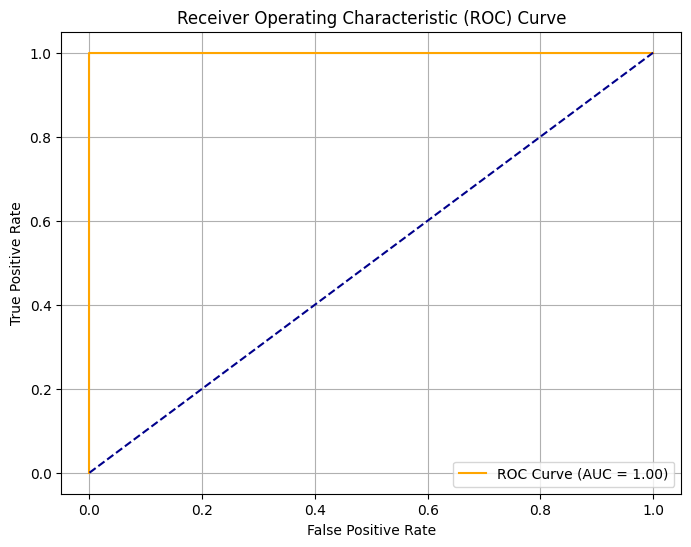

In [78]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()